In [66]:
# Load the Pandas libraries with alias 'pd' 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("winequalityN.csv") 
print (data.shape)
data = data.dropna()
print (data.shape)

(6497, 13)
(6463, 13)


In [54]:
## Replacing categorical variale wine type white to 0 and red to 1
data = data.replace('white', 0)
data = data.replace('red', 1)
#print (data.shape)

## Divide data into data and lael
#winedata = data.drop(['quality'],axis=1)
#print (wineData)
winequality = data['quality']
#print (wineQuality_index)
winedata = data
winedata.describe()
#winequality.describe

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.246480,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Text(0.5, 1.0, 'Correlation between variables')

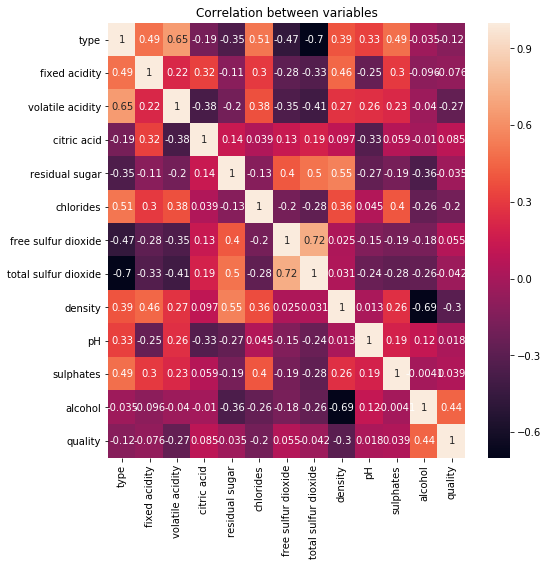

In [55]:
corr = winedata.corr()
fig, ax = plt.subplots(figsize = (8,8))
corrplot = sns.heatmap(corr, annot= True)
ax.set_title('Correlation between variables')

/Applications/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


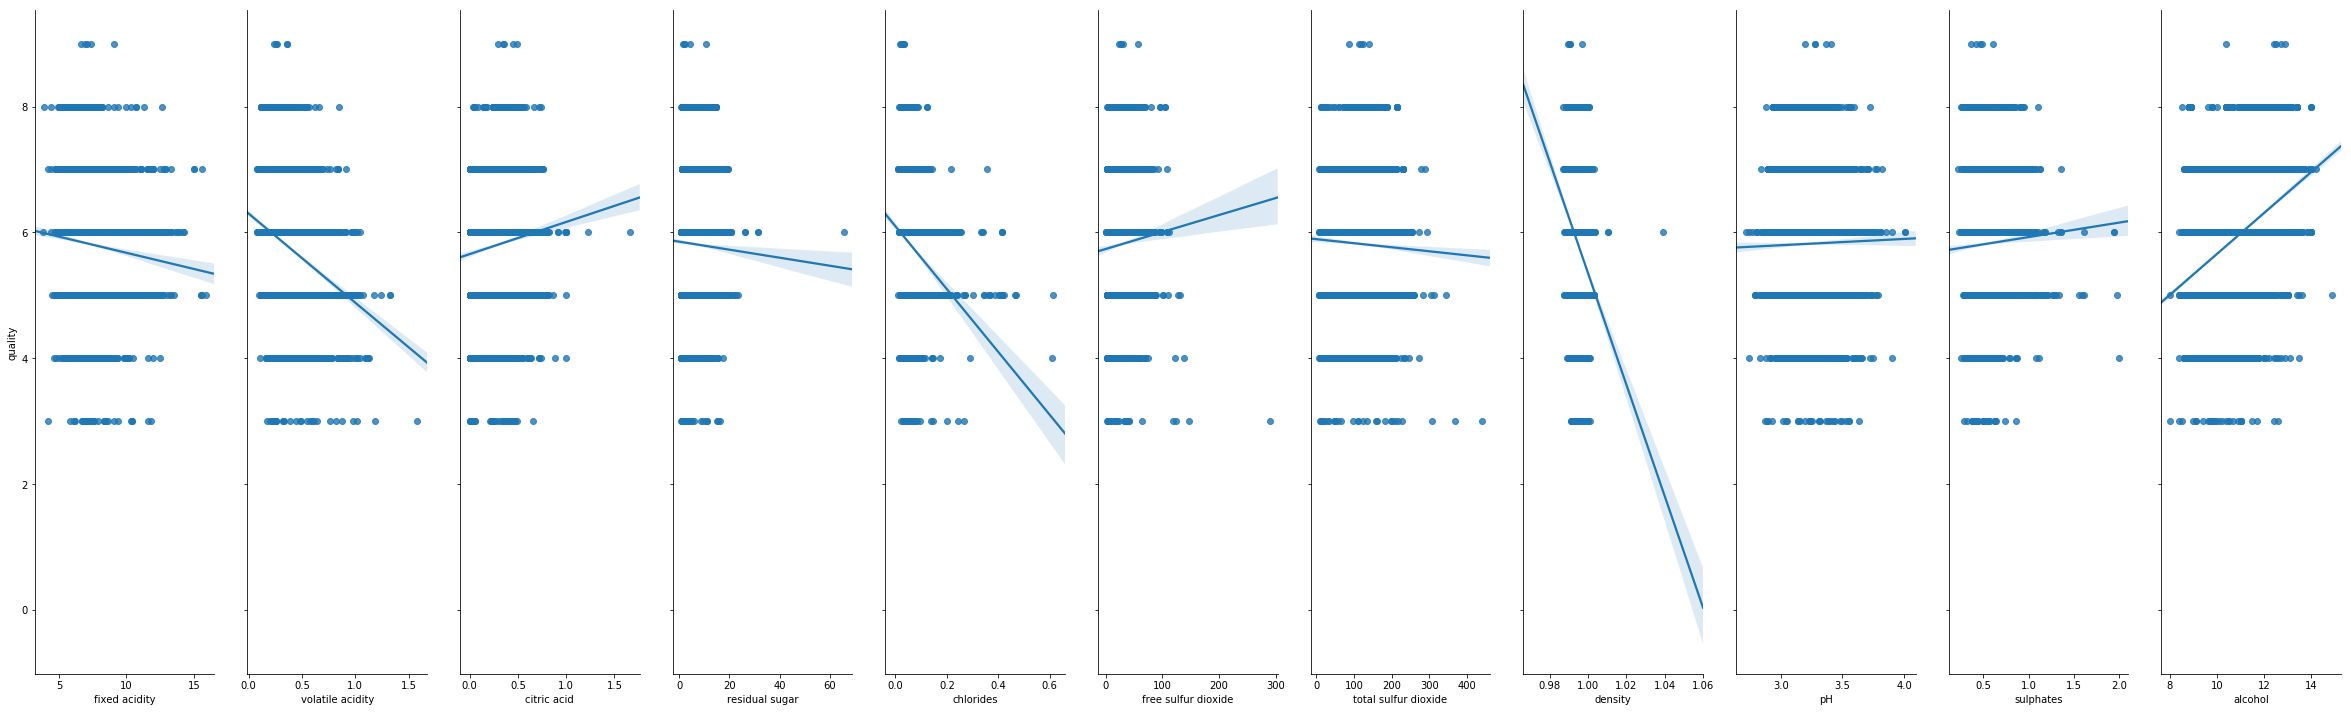

In [56]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x = winedata[features]
y = winedata['quality']
#plotting features vs quality
sns.pairplot(winedata,x_vars=features,y_vars='quality',kind='reg',size=10,aspect=0.3)

# (1) Linear Regression Fitting

In [57]:
winedata = winedata.values
print (winedata)
winequality = winequality.values.reshape(-1,1)
print (winequality)
## Divide data in traning and test sets
X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state=1)
print ((X_train.shape), len(X_test),len(y_train), len(y_test))

[[ 0.     7.     0.27  ...  0.45   8.8    6.   ]
 [ 0.     6.3    0.3   ...  0.49   9.5    6.   ]
 [ 0.     8.1    0.28  ...  0.44  10.1    6.   ]
 ...
 [ 1.     6.3    0.51  ...  0.75  11.     6.   ]
 [ 1.     5.9    0.645 ...  0.71  10.2    5.   ]
 [ 1.     6.     0.31  ...  0.66  11.     6.   ]]
[[6]
 [6]
 [6]
 ...
 [6]
 [5]
 [6]]
(5170, 13) 1293 5170 1293


In [58]:
##Standardize the data 
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#fitting data into linear regression model
reg = LinearRegression()
reg = reg.fit(X_train,y_train)

pred_y = reg.predict(X_test)
#mse = mean_squared_error(X_test, pred_y)
print (pred_y.shape)

#plt.scatter(X_test[:,1], y_test,color="red")
#plt.show()
#plt.scatter(X_test[:,1], pred_y, color="green", linewidth = 3)
#plt.show()

coeff = reg.coef_
coeff = np.reshape(coeff, [13,1])
coeff = pd.DataFrame( data = coeff, index = ['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'], columns = ['coefficient'] )
coeff

(1293, 1)


,coefficient
type,-2.608814e-16
fixed acidity,3.362118e-17
volatile acidity,-3.962483e-16
citric acid,-1.186517e-16
residual sugar,-1.146308e-16
chlorides,2.102012e-16
free sulfur dioxide,-2.522821e-16
total sulfur dioxide,-3.501806e-17
density,-3.639290e-17
pH,-6.362387e-16


Mean Absolute Error: 1.0015190533045495e-15
Mean Squared Error: 1.6167682898961184e-30
Root Mean Squared Error: 1.271522036732403e-15
(1293, 2)
    y_test  predicted_y
0      5.0          5.0
1      6.0          6.0
2      4.0          4.0
3      6.0          6.0
4      7.0          7.0
5      5.0          5.0
6      6.0          6.0
7      7.0          7.0
8      6.0          6.0
9      5.0          5.0
10     6.0          6.0
11     5.0          5.0
12     5.0          5.0
13     7.0          7.0
14     5.0          5.0
15     7.0          7.0
16     6.0          6.0
17     5.0          5.0
18     6.0          6.0
19     5.0          5.0
20     5.0          5.0
21     5.0          5.0
22     5.0          5.0
23     7.0          7.0
24     6.0          6.0
25     5.0          5.0
26     6.0          6.0
27     5.0          5.0
28     6.0          6.0
29     7.0          7.0
30     7.0          7.0
31     6.0          6.0
32     6.0          6.0
33     4.0          4.0
34     7.0      

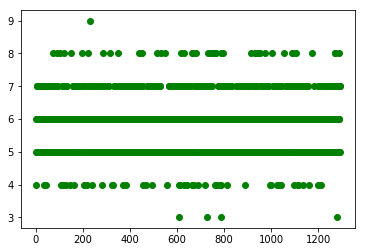

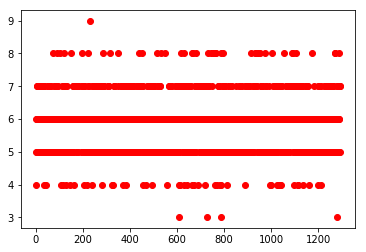

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))
#print(y_test.shape)
ydata = np.append( (y_test), (pred_y), axis = 1)
print(ydata.shape)
df = pd.DataFrame(ydata,columns = ['y_test', 'predicted_y'])
print (df.head(50))
x = np.linspace(0,1293,num = 1293,endpoint=True)
plt.scatter(x, y_test ,color="green", linewidth =1 )
plt.show()
plt.scatter(x, y_test ,color="red", linewidth = 1 )
plt.show()

In [33]:
test_score = reg.score(X_test, y_test)
train_score = reg.score(X_train, y_train)
print('Test_score: {:.2f}'.format(test_score))

print('Train_score: {:.2f}'.format(train_score))

Test_score: 1.00
Train_score: 1.00


# (2)Polynormial Regression Fitting

In [37]:

X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 3)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = PolynomialFeatures(degree = 3)
lg = LinearRegression()
lg.fit(X_train,y_train)
predicted_y = lg.predict(X_test)
#print (X_test, predicted_y, y_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

Mean Absolute Error: 0.9149265274555302
Mean Squared Error: 1.4872389791183294
Root Mean Squared Error: 1.2195240789415884


# (3) Ridge Regression Fitting

In [64]:
X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
RR = Ridge(alpha = 2)
RR.fit(X_train,y_train)
predicted_y = RR.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

Mean Absolute Error: 0.9327146171693739
Mean Squared Error: 1.608662026295437
Root Mean Squared Error: 1.2683304089611023


In [77]:
test_score = RR.score(X_test, y_test)
train_score = RR.score(X_train, y_train)
print('Test_score: {:.2f}'.format(test_score))

print('Train_score: {:.2f}'.format(train_score))

Test_score: 1.00
Train_score: 1.00


In [74]:
coeff = RR.coef_
coeff = np.reshape(coeff, [13,1])
coeff = pd.DataFrame( data = coeff, index = ['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'], columns = ['coefficient'] )
coeff

,coefficient
type,0.000091
fixed acidity,0.000049
volatile acidity,-0.000143
citric acid,-0.000006
residual sugar,0.000156
chlorides,-0.000015
free sulfur dioxide,0.000039
total sulfur dioxide,-0.000032
density,-0.000153
pH,0.000043


# (4) Lasso Regression Fitting

In [67]:
X_train, X_test, y_train, y_test = train_test_split(winedata, winequality, test_size=0.2, random_state = 5)
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
LR = Lasso(alpha = 1.0)
LR.fit(X_train,y_train)
predicted_y = LR.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

Mean Absolute Error: 0.9327146171693739
Mean Squared Error: 1.608662026295437
Root Mean Squared Error: 1.2683304089611023


In [75]:
test_score = LR.score(X_test, y_test)
train_score = LR.score(X_train, y_train)
print('Test_score: {:.2f}'.format(test_score))

print('Train_score: {:.2f}'.format(train_score))

Test_score: -0.00
Train_score: 0.00


In [76]:
coeff = LR.coef_
coeff = np.reshape(coeff, [13,1])
coeff = pd.DataFrame( data = coeff, index = ['type','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','quality'], columns = ['coefficient'] )
coeff

,coefficient
type,-0.0
fixed acidity,-0.0
volatile acidity,-0.0
citric acid,0.0
residual sugar,-0.0
chlorides,-0.0
free sulfur dioxide,0.0
total sulfur dioxide,-0.0
density,-0.0
pH,0.0


# visilization of regression model

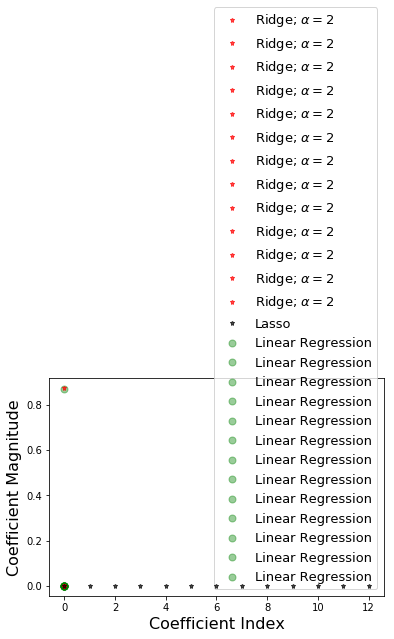

In [73]:
plt.plot(RR.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 2$',zorder=7) # zorder for ordering the markers
plt.plot(LR.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='black',label='Lasso',zorder=7) # zorder for ordering the markers
plt.plot(reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()